In [1]:
!pip install pandas
!pip install scipy
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

# Objetivo: importar bibliotecas essenciais para análise, visualização e normalização dos dados.


In [3]:
column_names = ['Sex', 'Length', 'Diameter', 'Height', 
                'WholeWeight', 'ShuckedWeight', 'VisceraWeight', 
                'ShellWeight', 'Rings']

df = pd.read_csv("abalone.data", header=None, names=column_names)

# Carregamos o arquivo `abalone.data` com nomes de colunas definidos manualmente

In [4]:
df.head()


,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sex            4177 non-null   object 
 1   Length         4177 non-null   float64
 2   Diameter       4177 non-null   float64
 3   Height         4177 non-null   float64
 4   WholeWeight    4177 non-null   float64
 5   ShuckedWeight  4177 non-null   float64
 6   VisceraWeight  4177 non-null   float64
 7   ShellWeight    4177 non-null   float64
 8   Rings          4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [6]:
df.describe()

,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [7]:
df.isnull().sum()

# Confirmamos que não há valores nulos no dataset (como esperado)


Sex              0
Length           0
Diameter         0
Height           0
WholeWeight      0
ShuckedWeight    0
VisceraWeight    0
ShellWeight      0
Rings            0
dtype: int64

Sex
M    1528
I    1342
F    1307
Name: count, dtype: int64


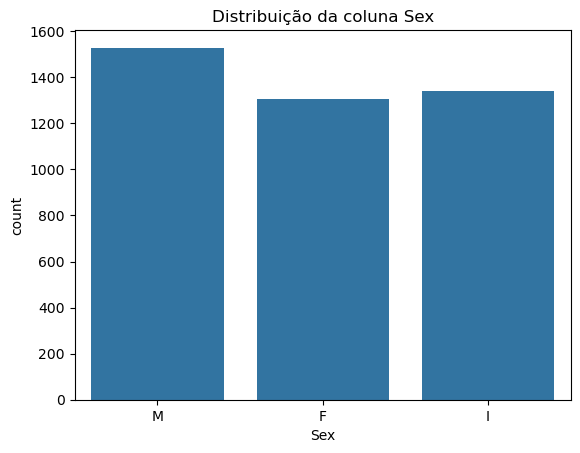

In [8]:
print(df['Sex'].value_counts())

sns.countplot(x='Sex', data=df)
plt.title('Distribuição da coluna Sex')
plt.show()

# Útil para visualizar distribuição das categorias M, F e I (infant)


In [9]:
# Remove espaços em branco e converte para string maiúscula padronizada
df['Sex'] = df['Sex'].astype(str).str.strip().str.upper()

# Agora sim aplica o mapeamento corretamente
df['Sex'] = df['Sex'].map({'M': 0, 'F': 1, 'I': 2})


In [10]:
df

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,1,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,0,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,0,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,1,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


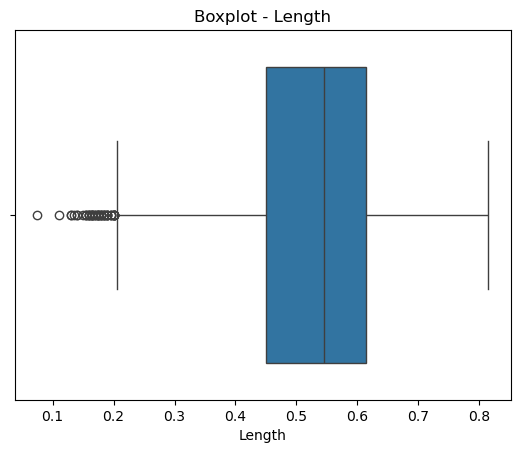

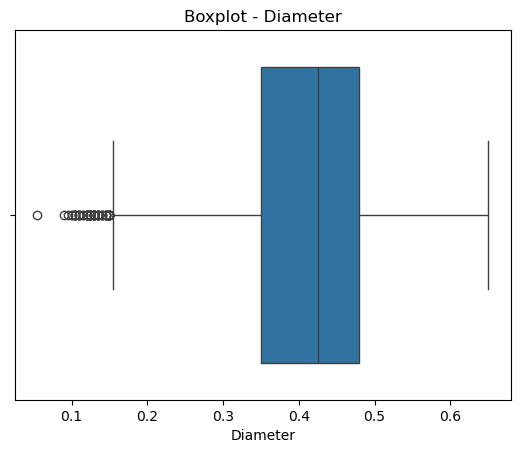

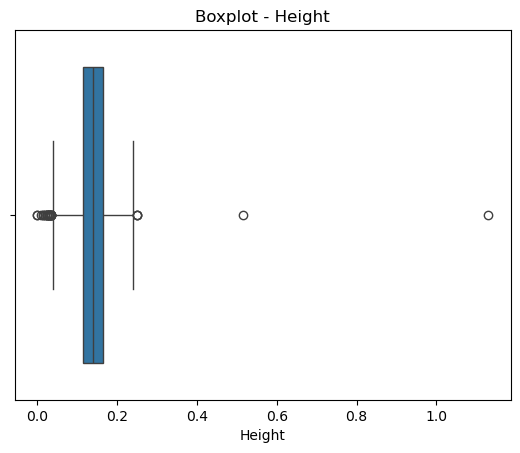

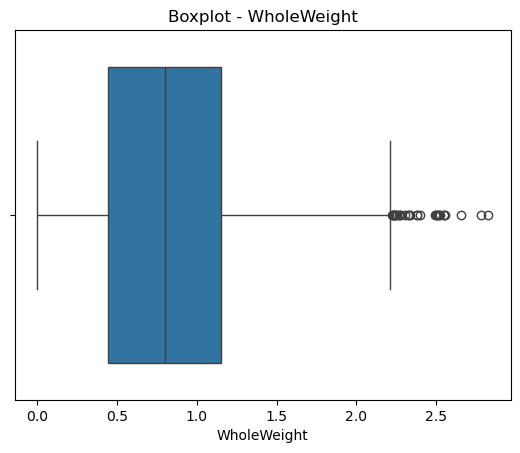

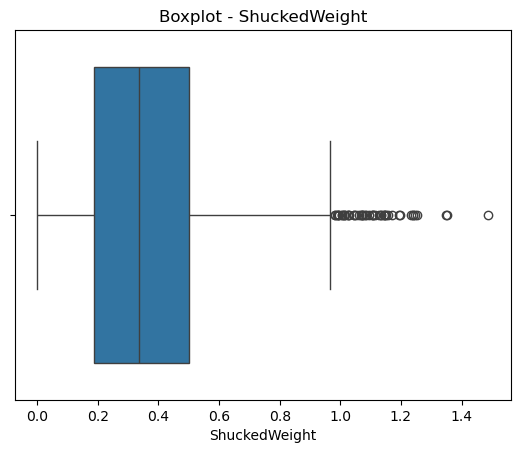

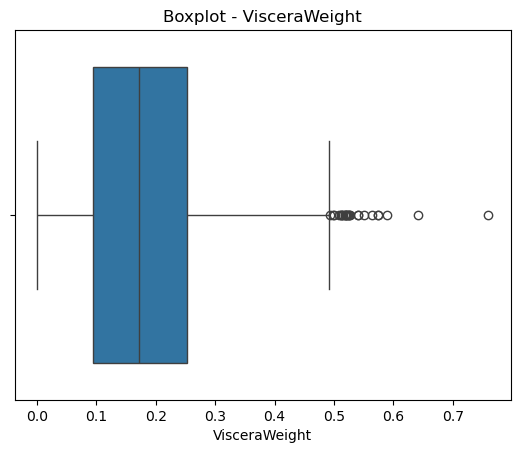

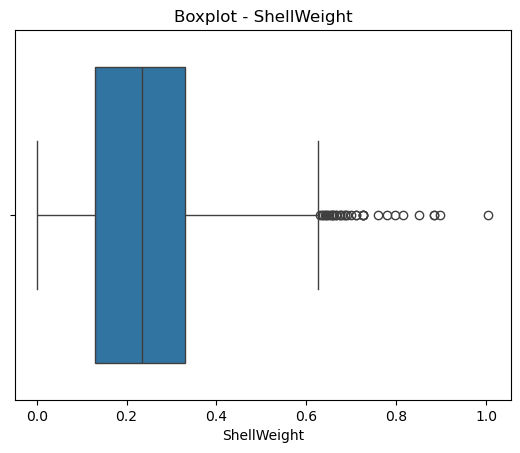

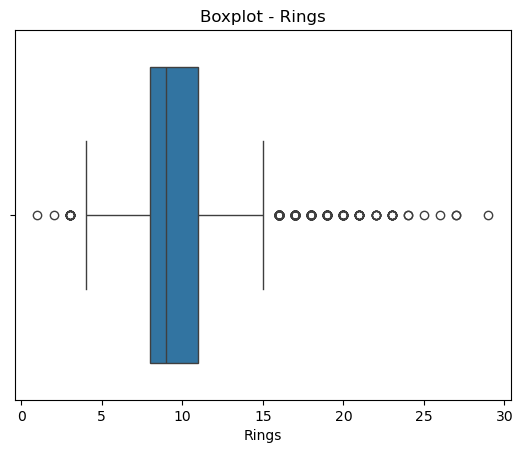

In [11]:
num_features = df.columns[1:]  # excluindo 'Sex'

for col in num_features:
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot - {col}')
    plt.show()


In [12]:
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower) & (df[col] <= upper)]
    return df

df_clean = remove_outliers_iqr(df, num_features)

# Reduzimos ruídos extremos que poderiam distorcer a clusterização


In [13]:
scaler = StandardScaler()
df_scaled = df_clean.copy()

df_scaled[num_features] = scaler.fit_transform(df_clean[num_features])

# Padronizamos os dados para média 0 e desvio padrão 1
# Essencial para algoritmos baseados em distância (como k-Means, DBScan)


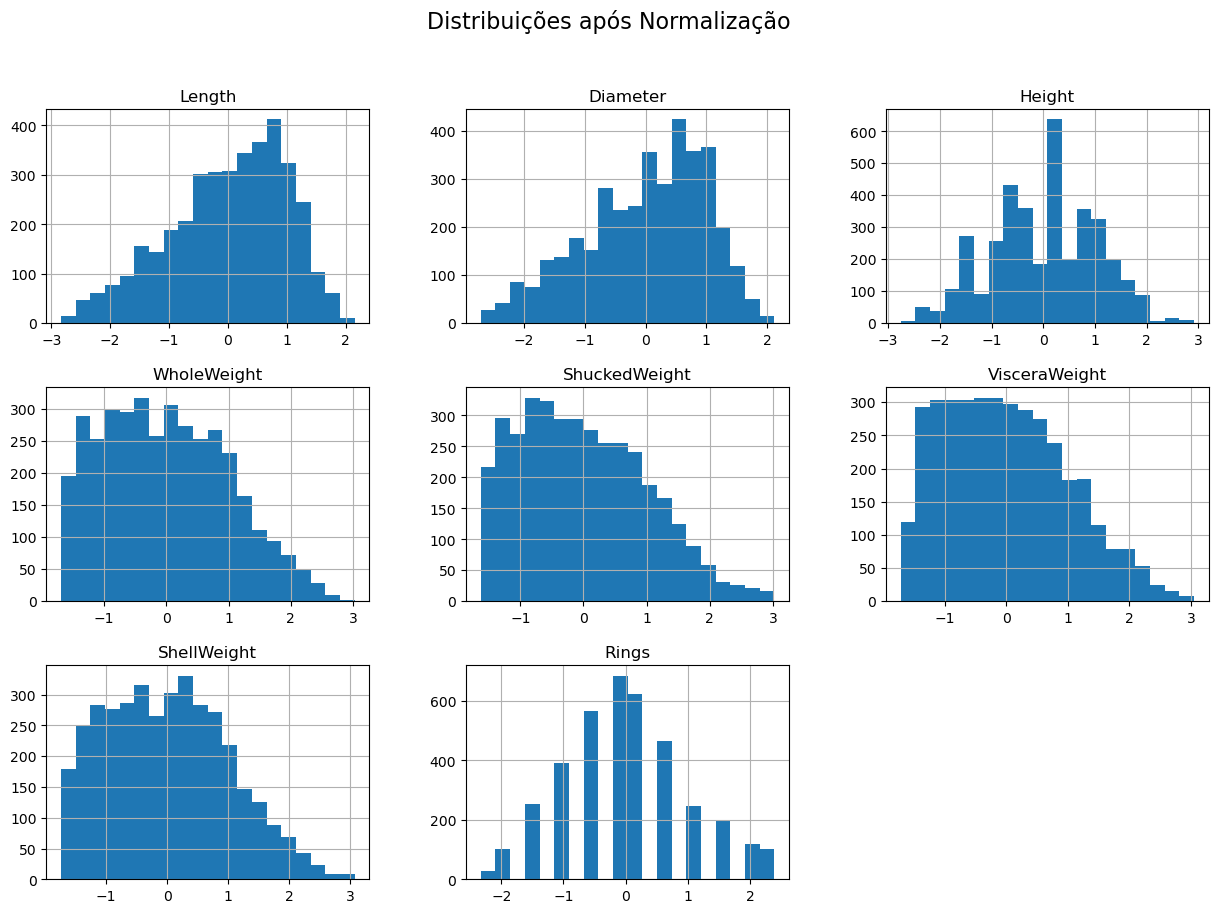

In [14]:
df_scaled[num_features].hist(bins=20, figsize=(15, 10))
plt.suptitle("Distribuições após Normalização", fontsize=16)
plt.show()


In [15]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.decomposition import PCA


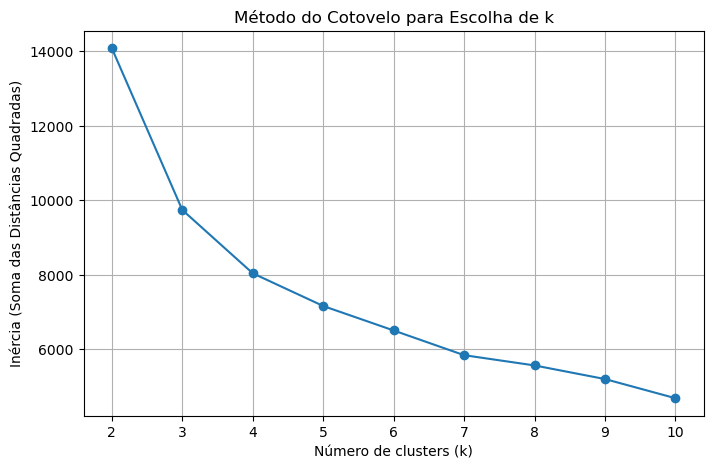

In [16]:
inertia = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inércia (Soma das Distâncias Quadradas)')
plt.title('Método do Cotovelo para Escolha de k')
plt.grid(True)
plt.show()

# Justificativa:
# A "inércia" mede quão compactos estão os clusters. O "cotovelo" indica onde a melhoria se estabiliza.


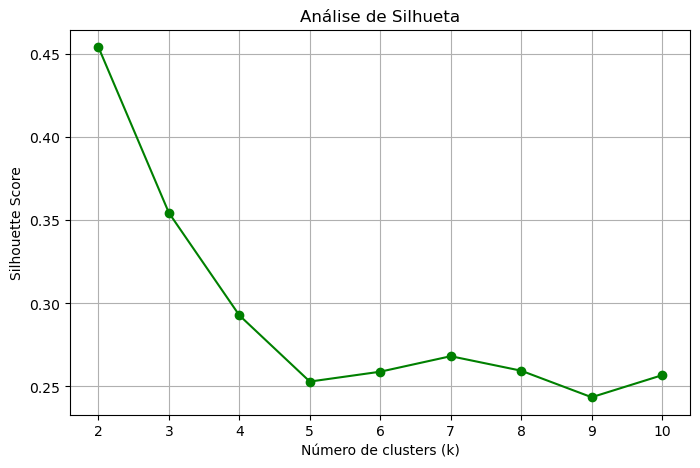

In [17]:
silhouette_scores = []

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df_scaled)
    score = silhouette_score(df_scaled, labels)
    silhouette_scores.append(score)

plt.figure(figsize=(8, 5))
plt.plot(K_range, silhouette_scores, marker='o', color='green')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Análise de Silhueta')
plt.grid(True)
plt.show()

# Justificativa:
# O Silhouette Score varia de -1 a 1 e mede a coesão e separação dos clusters.
# Quanto mais próximo de 1, melhor os clusters estão definidos.


In [18]:
best_k = 5  # (substituir com o valor ideal após análise do gráfico)
kmeans = KMeans(n_clusters=best_k, random_state=42)
labels = kmeans.fit_predict(df_scaled)

df_scaled['Cluster_KMeans'] = labels


In [19]:
sil_score = silhouette_score(df_scaled.drop('Cluster_KMeans', axis=1), labels)
db_score = davies_bouldin_score(df_scaled.drop('Cluster_KMeans', axis=1), labels)
ch_score = calinski_harabasz_score(df_scaled.drop('Cluster_KMeans', axis=1), labels)

print(f"Silhouette Score: {sil_score:.3f}")
print(f"Davies-Bouldin Score: {db_score:.3f}")
print(f"Calinski-Harabasz Score: {ch_score:.3f}")

# Interpretação:
# - Silhouette: quanto maior, melhor (idealmente > 0.5)
# - Davies-Bouldin: quanto menor, melhor
# - Calinski-Harabasz: quanto maior, melhor


Silhouette Score: 0.253
Davies-Bouldin Score: 1.251
Calinski-Harabasz Score: 3377.194


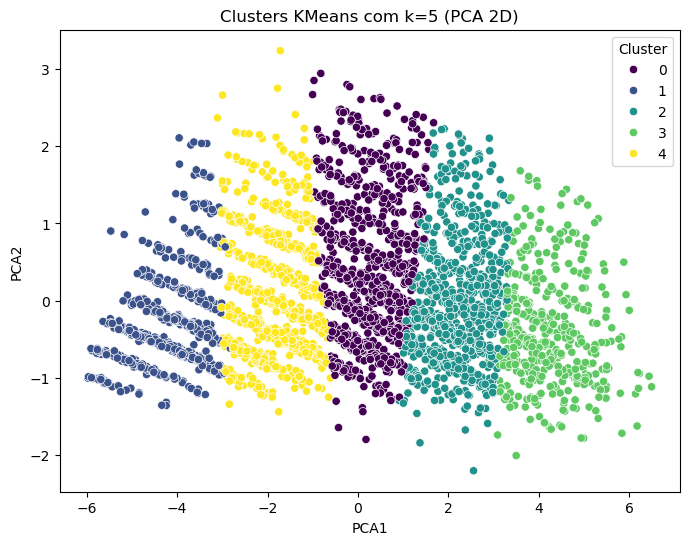

In [20]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled.drop('Cluster_KMeans', axis=1))

df_scaled['PCA1'] = pca_result[:, 0]
df_scaled['PCA2'] = pca_result[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster_KMeans', palette='viridis', data=df_scaled)
plt.title(f'Clusters KMeans com k={best_k} (PCA 2D)')
plt.legend(title='Cluster')
plt.show()

# Justificativa:
# PCA reduz a dimensionalidade preservando a variância, útil para visualizar dados em 2D


# Clusterização Espacial Baseada em Densidade (DBSCAN)

Vamos agrupar os dados com base na densidade, encontrando assim, clusters de formatos irregulares e identificando outliers.

Mas antes, vamos importar as bibliotecas necessárias e preparar os dados. Garantindo que vamos usar o conjunto de dados completo e aplicar o mesmo pré-processamento de escalonamento (StandardScaler) e codificação (OneHotEncoder) usado anteriormente.

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

numeric_features = df.select_dtypes(include=np.number).columns.tolist()
categorical_features = ['Sex']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

data_full_scaled = preprocessor.fit_transform(df)

print("Dados preparados para o DBSCAN. Dimensões:", data_full_scaled.shape)

Dados preparados para o DBSCAN. Dimensões: (4177, 12)


## Determinando os hiperparâmetros do DBSCAN

Valor de min_samples (2 * D): 24


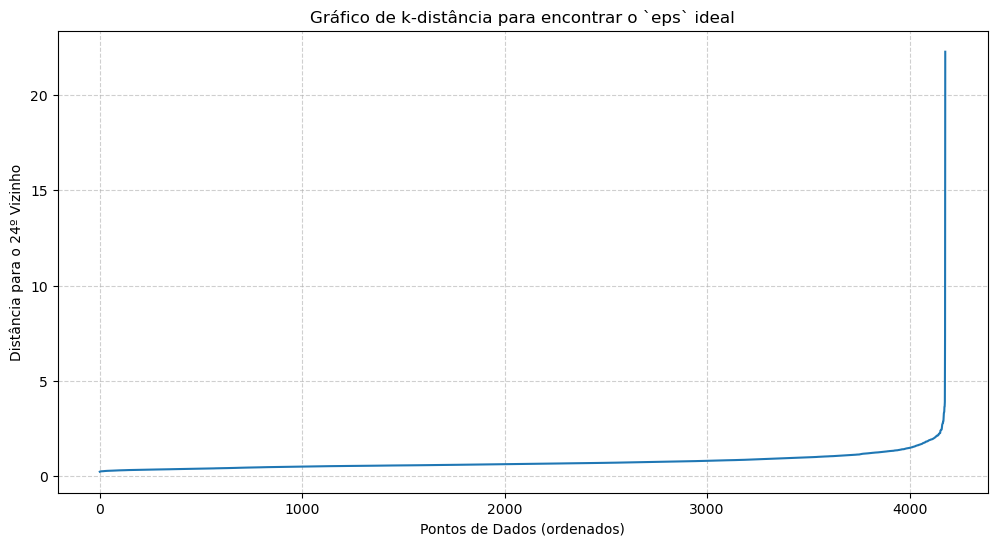


Valor de `eps` escolhido a partir do gráfico: 1.4


In [22]:
# 1. Definindo min_samples
D = data_full_scaled.shape[1]
min_samples = 2 * D
print(f"Valor de min_samples (2 * D): {min_samples}")

# 2. Encontrando o eps ideal com o gráfico de k-distância
k = min_samples
neighbors = NearestNeighbors(n_neighbors=k).fit(data_full_scaled)
distances, indices = neighbors.kneighbors(data_full_scaled)
k_distances = np.sort(distances[:, k-1], axis=0)

# Plotando o gráfico
plt.figure(figsize=(12, 6))
plt.plot(k_distances)
plt.title('Gráfico de k-distância para encontrar o `eps` ideal')
plt.xlabel('Pontos de Dados (ordenados)')
plt.ylabel(f'Distância para o {k}º Vizinho')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Com base no gráfico, um valor em torno de 1.4 parece ser o ponto de cotovelo.
eps_escolhido = 1.4
print(f"\nValor de `eps` escolhido a partir do gráfico: {eps_escolhido}")


## Treinamento e Análise do Modelo DBSCAN

In [23]:
# Instanciando e treinando o modelo DBSCAN
dbscan = DBSCAN(eps=eps_escolhido, min_samples=min_samples)
clusters_dbscan = dbscan.fit_predict(data_full_scaled)

# Analisando os resultados
n_clusters = len(set(clusters_dbscan)) - (1 if -1 in clusters_dbscan else 0)
n_noise = list(clusters_dbscan).count(-1)

print(f"Número de clusters encontrados: {n_clusters}")
print(f"Número de pontos de ruído (outliers): {n_noise}")
print("\nContagem de pontos por cluster:")
print(pd.Series(clusters_dbscan).value_counts())

Número de clusters encontrados: 3
Número de pontos de ruído (outliers): 56

Contagem de pontos por cluster:
 0    1503
 2    1332
 1    1286
-1      56
Name: count, dtype: int64


## Avaliação e Visualização dos Clusters


Coeficiente de Silhueta para os pontos principais: 0.2382


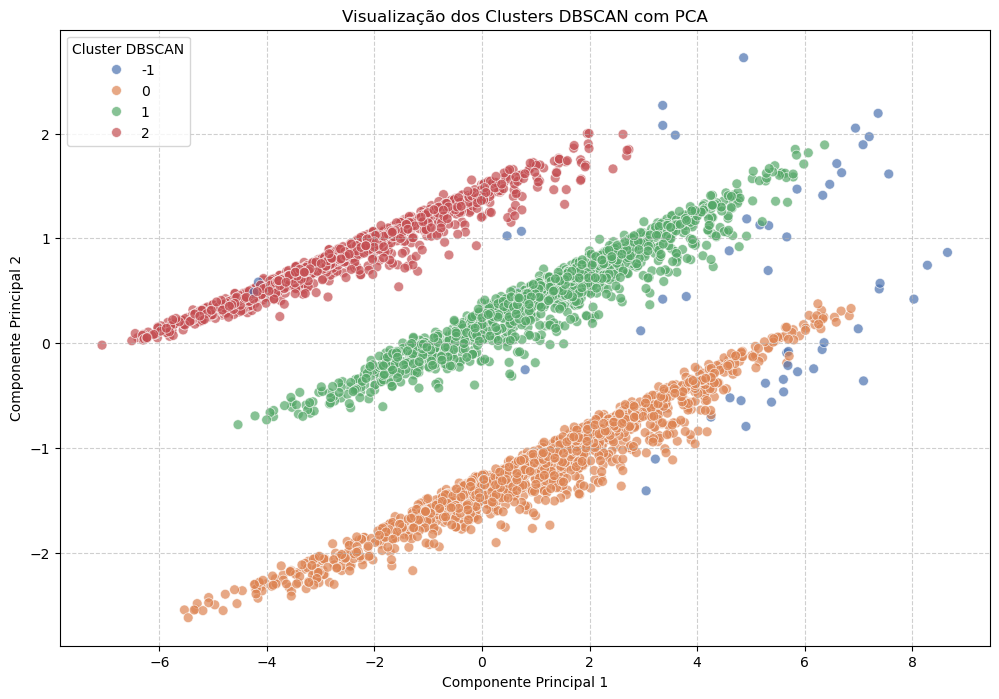

In [24]:
# Calculando o Coeficiente de Silhueta (apenas nos pontos principais)
mask_core_points = clusters_dbscan != -1
if np.sum(mask_core_points) > 0 and len(set(clusters_dbscan[mask_core_points])) > 1:
    silhouette_avg = silhouette_score(data_full_scaled[mask_core_points], clusters_dbscan[mask_core_points])
    print(f"\nCoeficiente de Silhueta para os pontos principais: {silhouette_avg:.4f}")
else:
    print("\nNão foi possível calcular o Coeficiente de Silhueta.")

# Visualizando os clusters com PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_full_scaled)

# Criando o gráfico de dispersão
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x=pca_result[:, 0],
    y=pca_result[:, 1],
    hue=clusters_dbscan,
    palette='deep',
    s=50,
    alpha=0.7
)
plt.title('Visualização dos Clusters DBSCAN com PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Cluster DBSCAN')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()